## Sparse Identification of Nonlinear Dynamics 

We first consider a dynamical system of the form: 

\begin{equation*}
    \frac{d}{dt} \mathbf{x}(t) = \mathbf{f}(\mathbf{x}(t)) \, ,  
\end{equation*}

A time-history of the state $\mathbf{x}(t)$ is collected and the derivative $\dot{\mathbf{x}}(t)$ is either measured or numerically approximated from $\mathbf{x}(t)$. The data are then arranged into two matrices: 

\begin{equation*}
    \mathbf{X} = \begin{bmatrix} 
        x_1(t_1) & x_2(t_1) & \ldots    & x_n(t_1) \\ 
        x_1(t_2) & x_2(t_2) & \ldots    & x_n(t_2) \\ 
        \vdots   & \vdots   & \ddots    & \vdots   \\ 
        x_1(t_m) & x_2(t_m) & \ldots    & x_n(t_m)       \end{bmatrix}  
\end{equation*} 

\begin{equation*}
    \dot{\mathbf{X}} = \begin{bmatrix}
        \dot{x}_1(t_1) & \dot{x}_2(t_1) & \ldots    & \dot{x}_n(t_1) \\ 
        \dot{x}_1(t_2) & \dot{x}_2(t_2) & \ldots    & \dot{x}_n(t_2) \\ 
        \vdots         & \vdots         & \ddots    & \vdots   \\ 
        \dot{x}_1(t_m) & \dot{x}_2(t_m) & \ldots    & \dot{x}_n(t_m)        \end{bmatrix}  
\end{equation*}

Next, a library consisting of nonlinear candidate functions of the columns of $\mathbf{X}$ is constructed:

\begin{equation*} 
\mathbf{\Theta(X)} =    \begin{bmatrix} 
    \;\vert & \vert    & \vert         & \vert         &        & \vert \; \\  
    \;1        & \mathbf{X}  & \mathbf{X}^{P_2} & \mathbf{X}^{P_3} & \ldots & sin(\mathbf{X}) & \ldots \; \\ 
    \;\vert & \vert    & \vert         & \vert         &        & \vert \;          \end{bmatrix} 
\end{equation*} 

where $\mathbf{X}^{P_2}$ and $\mathbf{X}^{P_3}$ denote higher order polynomials. For instance, $\mathbf{X}^{P_2}$ is:

\begin{equation*}
    \mathbf{X}^{P_2} =     \begin{bmatrix}
        x_1^2(t_1) & x_1(t_1) x_2(t_1) & \ldots & x_2^2(t_1) & \ldots    & x_n^2(t_1) \\ 
        x_1^2(t_2) & x_1(t_2) x_2(t_2) & \ldots & x_2^2(t_2) & \ldots    & x_n^2(t_2) \\ 
        \vdots     & \vdots            &        & \vdots     & \ddots    & \vdots     \\ 
        x_1^2(t_m) & x_1(t_m) x_2(t_m) & \ldots & x_2^2(t_m) & \ldots    & x_n^2(t_m)       \end{bmatrix}  
\end{equation*}

The relationship of the nonlinear library functions with the derivatives can be written as the following: 

\begin{equation*}
    \mathbf{ \dot{X} = \Theta(X) \Xi }
\end{equation*}

where $\Xi$ gives the linear combination of columns which produces $\mathbf{\dot{X}}$: 

\begin{equation*} 
    \mathbf{\Xi} =  \begin{bmatrix} 
        \xi_1 & \xi_2 & ... & \xi_n     \end{bmatrix} 
\end{equation*} 

The relationship can be broken down for each state variable: 

\begin{align*} 
    \dot{x}_1 & = & \mathbf{\Theta(X)} \xi_1 
    \\ 
    \dot{x}_2 & = & \mathbf{\Theta(X)} \xi_2 
    \\ 
            & \vdots & 
    \\ 
    \dot{x}_n & = & \mathbf{\Theta(X)} \xi_n 
\end{align*}




### LASSO 

The least squares solution for $\mathbf{\Xi}$ results in vectors with nonzero components for each element. To achieve a sparse solution where most of the entries are zero, LASSO regression can be used, where an $L^1$ regularization term is added to the least squares cost function: 

\begin{equation*} 
    \operatorname*{argmin}_{\Xi} || \mathbf{\Theta(X)} \Xi - \dot{\mathbf{X}} ||_2 + \lambda || \Xi ||_1
\end{equation*}

The regression is performed for each state, $x_i$, and then compiled : 

\begin{equation*} 
    \operatorname*{argmin}_{\xi_i} || \mathbf{\Theta(X)} \xi_i - \dot{\mathbf{x_i}} ||_2 + \lambda || \xi_i ||_1
\end{equation*}




## Example 

Let's define a system of ODEs and create "measurement" data: 

\begin{align*}
    \dot{x}_1 &= -\frac{1}{4} sin(x_1) \\ 
    \dot{x}_2 &= -\frac{1}{2} x_2 
\end{align*}

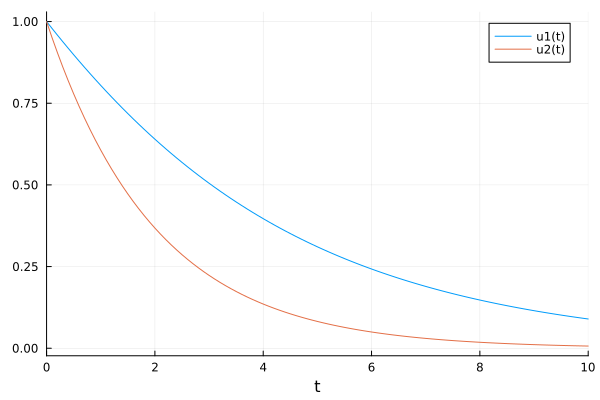

In [1]:
# ODEs 

using DifferentialEquations 

# ODE function 
function ODE_test(dx, x, p, t)

    dx[1] = -1/4 * sin(x[1]) ; 
    dx[2] = -1/2 * x[2] ; 

    return dx 

end 

# initial conditions 
x0 = [1; 1] ; 
n_vars = size(x0,1) ; 

# timespan 
ts   = (0.0, 10.0) ; 
dt   = 0.1 ; 

# solve ODE 
prob = ODEProblem(ODE_test, x0, ts) ; 
sol  = solve(prob, saveat = dt) ; 

using Plots 
plot(sol) 


Now compute derivatives using finite differencing: 

t type = 

Vector{

Float64}
xdot_true type = Vector{Vector{Float64}}
xdot type = Vector{Vector{Float64}}


t type = Vector{Float64}
xdot_true type = Matrix{Float64}
xdot type = Matrix{Float64}


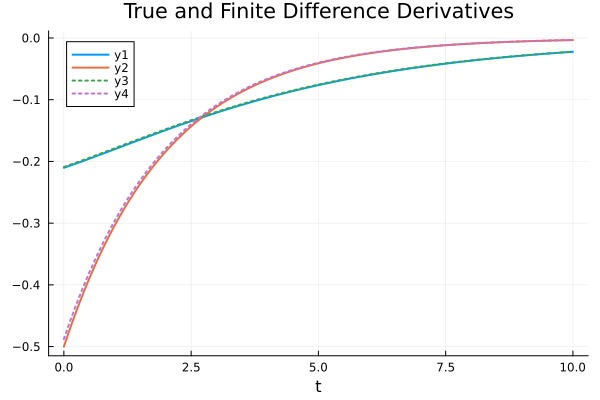

In [2]:
# finite differencing 

# extract variables 
x = sol.u ; 
t = sol.t ; 

# finite difference 
xdot = 0*x ; 
for i = 1 : length(x)-1
    xdot[i] = ( x[i+1] - x[i] ) / dt ; 
end 
xdot[end] = xdot[end-1] ; 

# true derivatives 
xdot_true = 0*xdot ; 
for i = 1 : length(x) 
    xdot_true[i] = ODE_test([0.0, 0.0], x[i], 0.0, 0.0 ) ; 
end 

println("t type = ", typeof(t)) 
println("xdot_true type = ", typeof(xdot_true)) 
println("xdot type = ", typeof(xdot)) 

# convert vector of vectors into matrix 
xdot_true = mapreduce(permutedims, vcat, xdot_true) 
xdot      = mapreduce(permutedims, vcat, xdot) 

println("t type = ", typeof(t)) 
println("xdot_true type = ", typeof(xdot_true)) 
println("xdot type = ", typeof(xdot)) 

using Plots 
plot(t, xdot_true, lw = 2) 
plot!(t, xdot, ls = :dot, lw = 2) 
title!("True and Finite Difference Derivatives")
xlabel!("t")


### Build library of candidate functions 

Our system $\mathbf{X}$ has 2 states, $x_1$ and $x_2$, and we shall build a library of the following nonlinear functions: 

- $1 = \mathbf{X}^{P_0}$
- $\mathbf{X} = \mathbf{X}^{P_1}$
- $\mathbf{X}^{P_2}$
- $sin(\mathbf{X})$

$\mathbf{\Theta(X)}$ would look like: 

\begin{equation*} \mathbf{\Theta(X)} = 
\begin{bmatrix} 
    \; 1    & x_1(t_1)  & x_2(t_2)  & x_1^2(t_1)    &   x_1(t_1)x_2(t_1)    &   x_2^2(t_1)  &   sin(x_1(t_1))   &   sin(x_2(t_1)) 
    \\ 
    \; 1    & x_1(t_2)  & x_2(t_2)  & x_1^2(t_2)    &   x_1(t_2)x_2(t_2)    &   x_2^2(t_2)  &   sin(x_1(t_2))   &   sin(x_2(t_2)) 
    \\ 
    \; \vdots & \vdots  & \vdots    & \vdots        &   \vdots              &   \vdots      &   \vdots          &   \vdots 
    \\ 
    \; 1    & x_1(t_m)  & x_2(t_m)  & x_1^2(t_m)    &   x_1(t_m)x_2(t_m)    &   x_2^2(t_m)  &   sin(x_1(t_m))   &   sin(x_2(t_m)) 
    \\ \end{bmatrix} 
\end{equation*} 




In [3]:
function pool_data(x, n_vars, poly_order) 
# ------------------------------------------------------------------------
# Purpose: Build data matrix based on possible functions 
# 
# Inputs: 
#   x           = data input 
#   n_vars      = # elements in state 
#   poly_order  = polynomial order (goes up to order 3) 
# 
# Outputs: 
#   THETA       = data matrix passed through function library 
# ------------------------------------------------------------------------

    # turn x into matrix and get length 
    xmat = mapreduce(permutedims, vcat, x) ; 
    m    = length(x) ; 

    # fil out 1st column of THETA with ones (poly order = 0) 
    ind = 1 ; 
    THETA = ones(m, ind) ; 

    # poly order 1 
    for i = 1 : n_vars 
        ind += 1 ; 
        THETA = [THETA xmat[:,i]]
    end 

    # poly order 2 
    if poly_order >= 2 
        for i = 1 : n_vars 
            for j = i:n_vars 

                ind += 1 ; 
                vec = xmat[:,i] .* xmat[:,j] ; 
                THETA = [THETA vec] ; 

            end 
        end 
    end 

    # poly order 3 
    if poly_order >= 3 
        for i = 1 : n_vars 
            for j = i : n_vars 
                for k = j : n_vars 
                    
                    ind += 1 ;                     
                    vec = xmat[:,i] .* xmat[:,j] .* xmat[:,k] ; 
                    THETA = [THETA vec] ; 

                end 
            end 
        end 
    end 

    # sine functions 
    for i = 1 : n_vars 
        ind += 1 ; 
        vec = sin.(xmat[:,i]) ; 
        THETA = [THETA vec] ; 
    end 
    
    return THETA 

end 

## TRY FUNCTION 

#define inputs 
n_vars     = 2 ; 
poly_order = n_vars ;

THETA = pool_data(x, n_vars, poly_order) ; 



Now perform sparse regression using LASSO, which is minimizing the following cost function: 

\begin{equation*} 
    \operatorname*{argmin}_{\Xi} || \mathbf{\Theta(X)} \Xi - \dot{\mathbf{X}} ||_2 + \lambda || \Xi ||_1
\end{equation*}

The regression is performed for each state, $x_i$, and then compiled : 

\begin{equation*} 
    \operatorname*{argmin}_{\xi_i} || \mathbf{\Theta(X)} \xi_i - \dot{\mathbf{x_i}} ||_2 + \lambda || \xi_i ||_1
\end{equation*}



In [17]:
function sparsify_dynamics( THETA, dx, lambda, n_vars ) 
# ------------------------------------------------------------------------
# Purpose: Solve for active terms in dynamics through sparse regression 
# 
# Inputs: 
#   THETA  = data matrix 
#   dx     = state derivatives 
#   lambda = sparsification knob (threshold) 
#   n_vars = # elements in state 
# 
# Outputs: 
#   XI     = sparse coefficients of dynamics 
# ------------------------------------------------------------------------

    # first perform least squares 
    XI = THETA \ dx ; 

    # sequentially thresholded least squares = LASSO. Do 10 iterations 
    for i = 1 : 10 

        # for each element in state 
        for j = 1 : n_vars 

            # small_inds = rows of XI < threshold 
            small_inds = findall( <(lambda), abs.(XI[:,j]) ) ; 

            # set elements < lambda to 0 
            XI[small_inds, j] .= 0 ; 

            # big_inds --> select columns of THETA 
            big_inds = findall( >(lambda), abs.(XI[:,j]) ) ; 

            # regress dynamics onto remaining terms to find sparse / active coefficients 
            XI[big_inds, j] .= THETA[:, big_inds] \ dx[:, j] ; 
            
        end 

    end 

    return XI 

end 

## TRY FUNCTION 

# sparsification knob 
lambda = 0.1 ; 

typeof(xdot) 
XI = sparsify_dynamics(THETA, xdot, lambda, n_vars)


8×2 Matrix{Float64}:
  0.0        0.0
  0.593997   0.0
  2.16248   -0.487707
 -1.53596    0.0
 -0.162797   0.0
 -0.291641   0.0
 -0.841886   0.0
 -0.316801   0.0